## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import dataset

In [2]:
df = pd.read_csv('banglore.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data preprocessing

#### Analyzing area_type feature

In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df['area_type'].isnull().sum()

0

In [7]:
sns.set_style(style = 'darkgrid')

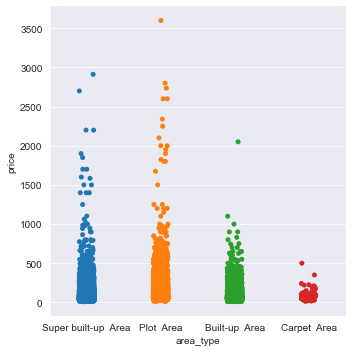

In [8]:
sns.catplot(x='area_type', y='price', data=df)

#### Analyze availability fearure

In [9]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
16-Jan               1
17-Jan               1
15-Aug               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [11]:
df['availability'].isnull().sum()

0

In [12]:
def mod_availability(x):
    try:
        if(x != 'Ready To Move'):
            x = 'Not Ready'
    except:
        return x
    return x

In [13]:
df['availability'] = df['availability'].apply(mod_availability)

In [14]:
df['availability'].head()

0        Not Ready
1    Ready To Move
2    Ready To Move
3    Ready To Move
4    Ready To Move
Name: availability, dtype: object

In [15]:
df['availability'].value_counts()

Ready To Move    10581
Not Ready         2739
Name: availability, dtype: int64

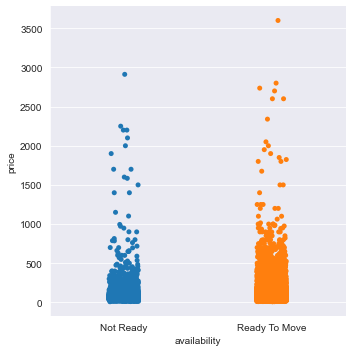

In [16]:
sns.catplot(x='availability', y='price', data=df)

#### Analyze location feature

In [17]:
len(df['location'].unique())

1306

In [18]:
df['location'] = df['location'].astype(str).apply(lambda x : x.strip())

In [19]:
len(df['location'].unique())

1295

In [20]:
location_stats = df['location'].value_counts()

In [21]:
loc_less_10 = location_stats[location_stats <= 10]

In [22]:
df['location'] = df['location'].apply(lambda x : 'other' if x in loc_less_10 else x )

In [23]:
df['location'].value_counts()

other                        2886
Whitefield                    541
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Narayanapura                   11
Kodigehalli                    11
HAL 2nd Stage                  11
2nd Phase Judicial Layout      11
Marsur                         11
Name: location, Length: 242, dtype: int64

In [24]:
len(df['location'].unique())

242

#### Analyze size feature

In [25]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [26]:
df['size'].isnull().sum()

16

In [27]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
16 BHK           1
13 BHK           1
43 Bedroom       1
12 Bedroom       1
14 BHK           1
19 BHK           1
18 Bedroom       1
27 BHK           1
Name: size, dtype: int64

In [28]:
def get_bhk(x):
    try:
        bhk = int(x.split(' ')[0])
    except:
        bhk = None      
    return bhk

In [29]:
get_bhk('nan')

In [30]:
df['size'] = df['size'].astype(str).apply(get_bhk)

In [31]:
df.groupby('size')['size'].agg('count')

size
1.0      656
2.0     5528
3.0     4857
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
12.0       1
13.0       1
14.0       1
16.0       1
18.0       1
19.0       1
27.0       1
43.0       1
Name: size, dtype: int64

In [32]:
df['size'].isnull().sum()

16

#### Drop society feature

In [33]:
df = df.drop('society', axis='columns')

In [34]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


#### Analyze total_sqft feature

In [35]:
df['total_sqft'].isnull().sum()

0

In [36]:
import re

In [37]:
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if(len(tokens) == 2):
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return float(re.findall(r'\d+', x)[0])

In [38]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

#### Analyze bath feature

In [39]:
df['bath'].isnull().sum()

73

In [40]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

#### Analyze balcony feature

In [41]:
df['balcony'].isnull().sum()

609

In [42]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

#### Analyze price

In [43]:
df['price'].isnull().sum()

0

## Feature engineering

In [44]:
## Handling null values

df.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [45]:
## Fill null values with median

df['size'] = df['size'].fillna(df['size'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [46]:
## Add new column price_per_sqft

df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [47]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [48]:
## Adding new column sqft_per_room

df['sqft_per_room'] = df['total_sqft']/df['size']

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_room
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0


In [49]:
## Adding new column bath_per_room

df['bath_per_room'] =df['bath']/df['size']

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_room,bath_per_room
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0,1.000000
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0,1.250000
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0,0.666667
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0,1.000000
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0,1.000000


In [50]:
df['bath_per_room'].describe()

count    13320.000000
mean         0.966942
std          0.179933
min          0.250000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: bath_per_room, dtype: float64

## Outlier detection

In [51]:
# remove rows where sqft_per_room < 300

df.drop(df[df['sqft_per_room'] < 300].index, inplace = True)

In [52]:
# remove rows where bath_per_room > 1.5

df.drop(df[df['bath_per_room'] > 1.5].index, inplace = True)

In [53]:
# analyze price_per_sqft column

df['price_per_sqft'].describe()

count     12448.000000
mean       6283.618516
std        4116.676163
min         267.829813
25%        4206.400832
50%        5286.466186
75%        6898.230225
max      176470.588235
Name: price_per_sqft, dtype: float64

In [54]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df1 = remove_pps_outliers(df)
print(len(df), len(df1))


12448 10234


In [55]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_room,bath_per_room
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,2850.0,4.0,1.0,428.0,15017.543860,712.500000,1.000000
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,1630.0,3.0,2.0,194.0,11901.840491,543.333333,1.000000
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3.0,1875.0,2.0,3.0,235.0,12533.333333,625.000000,0.666667
3,Built-up Area,Not Ready,1st Block Jayanagar,3.0,1200.0,2.0,0.0,130.0,10833.333333,400.000000,0.666667
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,1235.0,2.0,2.0,148.0,11983.805668,617.500000,1.000000


In [56]:
# Handling categorical variables

cat_features = ['area_type', 'availability', 'location']

df2 = pd.get_dummies(df1, columns = cat_features, drop_first=True)

In [57]:
df2.head()

,size,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_room,bath_per_room,area_type_Carpet Area,area_type_Plot Area,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,2850.0,4.0,1.0,428.0,15017.543860,712.500000,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,2.0,194.0,11901.840491,543.333333,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,3.0,235.0,12533.333333,625.000000,0.666667,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,0.0,130.0,10833.333333,400.000000,0.666667,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,2.0,148.0,11983.805668,617.500000,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# drop unnesessary columns

df2.drop(columns=['price_per_sqft', 'bath_per_room', 'sqft_per_room'], inplace= True)

In [59]:
df2.head()

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,2850.0,4.0,1.0,428.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,2.0,194.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,3.0,235.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,0.0,130.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,2.0,148.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Split the data into independent and dependant variables

X = df2.drop('price', axis='columns').values
y = df2['price'].values

In [61]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(X_train)

[[2.000e+00 1.200e+03 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 1.430e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 1.217e+03 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [3.000e+00 1.610e+03 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 1.100e+03 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 1.460e+03 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


## Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:,0:4 ] = sc.fit_transform(X_train[:,0:4 ])
X_test[:,0:4 ] = sc.transform(X_test[:,0:4 ])

## Model Selection

In [63]:
# We will try Decision tree, random forest, XGBoost

In [82]:
from sklearn.linear_model import LinearRegression

dt = LinearRegression(normalize=True)
dt.fit(X_train, y_train)

LinearRegression(normalize=True)

In [83]:
y_pred = dt.predict(X_test)

In [78]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8388383596530901

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [80]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[179.7  140.  ]
 [100.6   40.  ]
 [183.1  230.  ]
 ...
 [ 51.02  46.  ]
 [131.6  121.  ]
 [ 66.94  57.  ]]


In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8124289619164

In [88]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5095408678788435